### Import modules

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt
import copy
import sys
import matplotlib
import seaborn as sns


# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

### Load collider

In [2]:
# Define study
collider = xt.Multiline.from_json("/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/master_study/scans/injection_oct_scan_for_experiment/base_collider/xtrack_0000/collider.json")

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           


In [3]:
collider.build_trackers()

Compiling ContextCpu kernels...


8767a18c60a74718a416995960439fbe.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 8767a18c60a74718a416995960439fbe.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


23312050eb0e414cabb3640612861fa0.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 23312050eb0e414cabb3640612861fa0.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


### Twiss and plot

In [48]:
def tw_to_rotated_df(tw):
    tw_pd = tw.to_pandas()
    # Get index ip1
    ip1 = tw_pd.index[tw_pd['name'] == 'ip1'][0]
    # Rotate the dataframe to have ip1 at the beginning
    tw_pd = pd.concat([tw_pd[ip1:], tw_pd[:ip1]], axis=0)
    return tw_pd

collider.vars['phase_change.b1'] = 1.
collider.vars['phase_change.b2'] = 1.
s_b1 = collider.lhcb1.twiss()[['s']]
s_b2 = collider.lhcb2.twiss()[['s']]

tw_b1_pd_knob = tw_to_rotated_df(collider.lhcb1.twiss())
tw_b2_pd_knob = tw_to_rotated_df(collider.lhcb2.twiss())
collider.vars['phase_change.b1'] = 0.
collider.vars['phase_change.b2'] = 0.
tw_b1_pd_no_knob = tw_to_rotated_df(collider.lhcb1.twiss())
tw_b2_pd_no_knob = tw_to_rotated_df(collider.lhcb2.twiss())


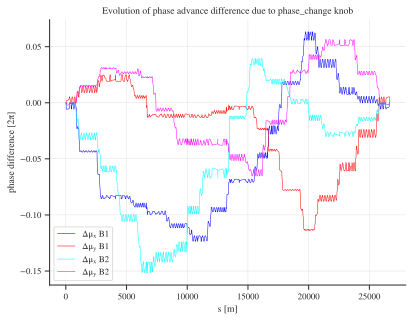

In [62]:
# Compute phase advance b1
mux_b1_phase_change = tw_b1_pd_knob[['mux']]
muy_b1_phase_change = tw_b1_pd_knob[['muy']]
mux_b1_no_phase_change = tw_b1_pd_no_knob[['mux']]
muy_b1_no_phase_change = tw_b1_pd_no_knob[['muy']]

# Have all phases start at 0
mux_b1_phase_change -= mux_b1_phase_change.iloc[0]
muy_b1_phase_change -= muy_b1_phase_change.iloc[0]
mux_b1_no_phase_change -= mux_b1_no_phase_change.iloc[0]
muy_b1_no_phase_change -= muy_b1_no_phase_change.iloc[0]

# Compute phase advance b2
mux_b2_phase_change = tw_b2_pd_knob[['mux']]
muy_b2_phase_change = tw_b2_pd_knob[['muy']]
mux_b2_no_phase_change = tw_b2_pd_no_knob[['mux']]
muy_b2_no_phase_change = tw_b2_pd_no_knob[['muy']]

# Have all phases start at 0
mux_b2_phase_change -= mux_b2_phase_change.iloc[0]
muy_b2_phase_change -= muy_b2_phase_change.iloc[0]
mux_b2_no_phase_change -= mux_b2_no_phase_change.iloc[0]
muy_b2_no_phase_change -= muy_b2_no_phase_change.iloc[0]

plt.plot(s_b1, mux_b1_phase_change - mux_b1_no_phase_change, label = r'$ \Delta \mu_x$ B1', color = 'blue')
plt.plot(s_b1, muy_b1_phase_change - muy_b1_no_phase_change, label = r'$ \Delta \mu_y$ B1', color = 'red')
plt.plot(s_b2[::-1], -(mux_b2_phase_change - mux_b2_no_phase_change), label = r'$ \Delta \mu_x$ B2', color = 'cyan')
plt.plot(s_b2[::-1], -(muy_b2_phase_change - muy_b2_no_phase_change), label = r'$ \Delta \mu_y$ B2', color = 'magenta')
plt.title('Evolution of phase advance difference due to phase_change knob')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel(r'phase difference [$2\pi$]')
plt.legend()
plt.savefig('phase_change_knob.png', dpi=300)
plt.show()

In [ ]:
collider.vars['phase_change.b1']._info()

#  vars['phase_change.b1']._get_value()
   vars['phase_change.b1'] = 0.0

#  vars['phase_change.b1']._expr is None

#  vars['phase_change.b1']._find_dependant_targets()
   vars['kqtf.a67b1']
   eref['lhcb1']['mqt.14r6.b1..1'].knl[1]
   eref['lhcb1']['mqt.14r6.b1..2'].knl[1]
   eref['lhcb1']['mqt.14r6.b1..3'].knl[1]
   ... set _info(limit=None) to get all lines



In [ ]:
collider.lhcb1.vars['phase_change.b1']._info()

#  vars['phase_change.b1']._get_value()
   vars['phase_change.b1'] = 0.0

#  vars['phase_change.b1']._expr is None

#  vars['phase_change.b1']._find_dependant_targets()
   vars['kqtf.a67b1']
   eref['lhcb1']['mqt.14r6.b1..1'].knl[1]
   eref['lhcb1']['mqt.14r6.b1..2'].knl[1]
   eref['lhcb1']['mqt.14r6.b1..3'].knl[1]
   ... set _info(limit=None) to get all lines

